# Method of lines

We're moving on to time-dependent problems, which end up being reduced to systems of ODEs in time. So we need a refresher on solution methods for IVPs,

$$
\partial_t \bfu = \bff(t,\bfu), \quad a \le t \le b, \quad \bfu(a) = \bfu_0. 
$$

All the methods aim to produce an increasing sequence of times $t_0=a,t_1,t_2,\ldots,t_n=b$ and a sequence of corresponding approximate solution values $\bfu_0,\ldots,\bfu_n$. Unlike a BVP, in an IVP there is an "arrow of time" that says the future is determined by the past, and not the other way around. Because of this, IVP solvers are **marching methods** that start from the initial condition and compute the solution values sequentially.

For example, here is a solution of the scalar problem $\dot{u}=t+u$, $u(0)=1$, using a well-known RK4 method.

In [1]:
using OrdinaryDiffEq

f(u,p,t) = t + u
tspan = (0.0,3.0)
ivp = ODEProblem(f,1.,tspan)
sol = solve(ivp,RK4())
[sol.t sol.u]

17×2 Matrix{Float64}:
 0.0         1.0
 0.0472989   1.04957
 0.124425    1.14057
 0.218779    1.27033
 0.340895    1.47152
 0.484284    1.76174
 0.651756    2.18605
 0.83973     2.79174
 1.04786     3.65518
 1.27373     4.87454
 1.516       6.59179
 1.77274     9.00093
 2.04241    12.3754
 2.32338    17.096
 2.61423    23.6976
 2.9136     32.9299
 3.0        36.1681

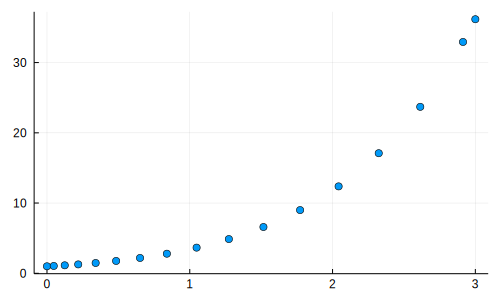

In [2]:
using Plots
default(size=(500,300))
scatter(sol.t,sol.u)

Even though the solution is computed only at selected values of $t$, most modern solvers provide interpolation methods that allow you to evaluate the solution anywhere you'd like.

In [3]:
sol(0.1),sol(0.5)

(1.1103416447626908, 1.7974392108542478)

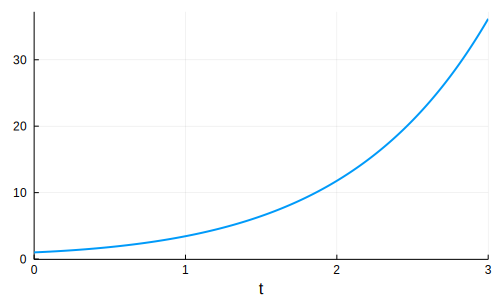

In [4]:
plot(sol,label="")

Note that we had to write a function of not just `u` and `t` but also a third argument, `p`. Its role is to allow the specification of parameters that are constant during one IVP solution but may be varied between different versions of the problem. 

Here is the famous Lotka-Volterra system.

In [5]:
function predprey(u,params,t)
    rabbits,foxes = u 
    ⍺,β,γ,δ = params
    ∂ₜrabbits = ⍺*rabbits - β*rabbits*foxes
    ∂ₜfoxes = γ*rabbits*foxes - δ*foxes
    return [∂ₜrabbits,∂ₜfoxes]
end

u₀ = [40,2]
tspan = (0.0,150.0)
ivp = ODEProblem(predprey,u₀,tspan,(0.2,0.1,0.05,0.3))
sol = solve(ivp,BS5())

retcode: Success
Interpolation: specialized 5th order lazy interpolation
t: 65-element Vector{Float64}:
   0.0
   0.08657037693646137
   0.32582659340954606
   0.6636454065802964
   1.0795417420815696
   1.690355370422986
   2.31216663035105
   2.960711567191257
   3.651457283736259
   4.433108299047775
   5.357519393831609
   6.517713816208987
   8.133780991861643
   ⋮
 122.67507998171749
 126.63429542164089
 130.97697399396054
 136.45848306537033
 140.61275457382956
 142.86507795855513
 144.67117813120734
 146.04484685487282
 147.22035903631857
 148.35036376020804
 149.69108069511051
 150.0
u: 65-element Vector{Vector{Float64}}:
 [40.0, 2.0]
 [39.94649366444369, 2.3169242394383023]
 [39.13797610105441, 3.4644895289887883]
 [35.841312396002785, 5.920584859344608]
 [27.9483707161307, 10.210865023424816]
 [13.950643028582984, 16.026830810916906]
 [5.421695550476489, 17.64883141971084]
 [2.0379133780842156, 16.23880672504376]
 [0.8275402275010022, 13.81742115696672]
 [0.3652092838647842,

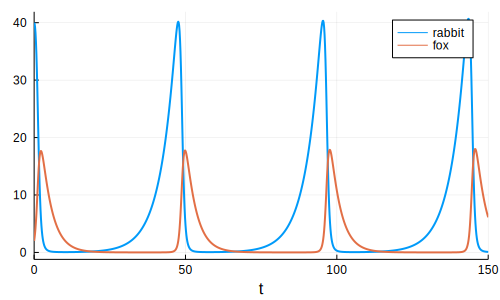

In [6]:
plot(sol,label=["rabbit" "fox"])

For larger problems, it's more efficient to write the time-derivative function in a *mutating* manner. It's not really any harder for us to do:

In [7]:
function predprey!(dudt,u,params,t)
    rabbits,foxes = u 
    ⍺,β,γ,δ = params
    dudt[1] = ⍺*rabbits - β*rabbits*foxes
    dudt[2] = γ*rabbits*foxes - δ*foxes
    return nothing
end

u₀ = [40,2]
tspan = (0.0,150.0)
ivp = ODEProblem(predprey!,u₀,tspan,(0.2,0.05,0.1,0.5))
sol = solve(ivp,BS5());
sol.(50:54)

5-element Vector{Vector{Float64}}:
 [39.95765343424383, 1.5644187399022453]
 [25.4580328635149, 38.99335793043325]
 [1.5401230982961156, 60.77302735919979]
 [0.15677668155009364, 38.97662156675298]
 [0.04102365301393628, 23.833265433624877]